<h1>Correlation of Cryptos' prices from top 11 by Market Cap<br><u>over 2 years</u></h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Get List of Top 11 Cryptos by Market Cap from coinmarketcap.com</h2>

In [2]:
from coinMarketCap import getTopHistory
dfs = getTopHistory(limit=11, days=730)

pd.DataFrame(dfs.keys())

,0
0,BTC
1,ETH
2,BNB
3,USDT
4,SOL
5,ADA
6,XRP
7,DOT
8,DOGE
9,USDC


In [3]:
closePrice_df = pd.concat([dfs[key]['close'] for key in dfs],axis=1, keys=list(dfs.keys()))
closePrice_df

,BTC,ETH,BNB,USDT,SOL,ADA,XRP,DOT,DOGE,USDC,SHIB
timestamp,,,,,,,,,,,
2019-11-15,8491.992012,180.521181,20.316226,1.001369,NaN,0.043974,0.261654,NaN,0.002657,1.002590,NaN
2019-11-16,8550.760557,183.348359,20.282653,1.006746,NaN,0.044172,0.263886,NaN,0.002669,1.007969,NaN
2019-11-17,8577.975782,185.119236,20.260793,1.008471,NaN,0.045421,0.265253,NaN,0.002648,1.008219,NaN
2019-11-18,8309.285983,180.559605,19.316870,1.012008,NaN,0.043802,0.255653,NaN,0.002576,1.013629,NaN
2019-11-19,8206.145918,177.455545,18.703299,1.008968,NaN,0.042542,0.256500,NaN,0.002548,1.010225,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,67566.830088,4812.087614,654.315002,1.000443,248.467178,2.124419,1.282377,53.348459,0.282359,0.999828,0.000055
2021-11-09,66971.828097,4735.068755,635.190595,1.000202,239.213138,2.273483,1.258930,50.779363,0.273526,1.000075,0.000055
2021-11-10,64995.229391,4636.174214,615.278062,1.000097,233.779519,2.101802,1.193373,46.871331,0.255709,0.999523,0.000050


<h2>Calculate Pearson and Spearman Correlation by Price over Two Years (Without moving Avegare)</h2>

Text(0.5, 0.98, 'Correlation over two past years')

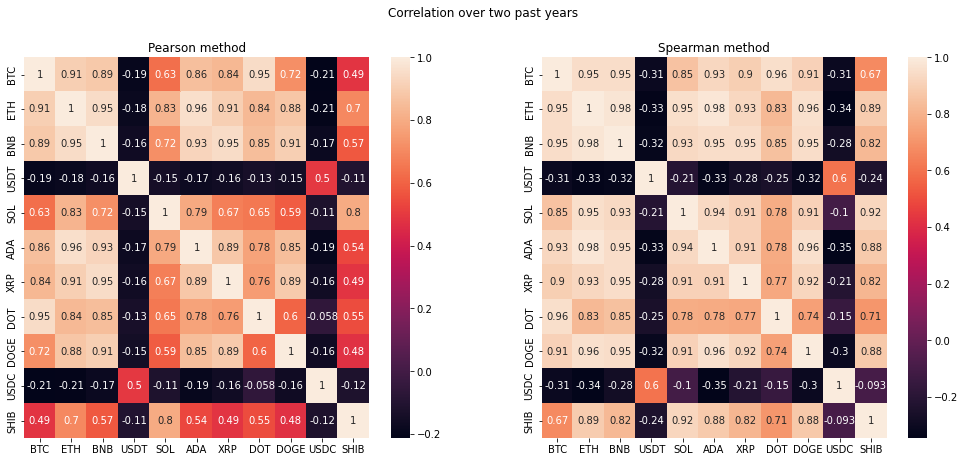

In [9]:
pearson_corr = closePrice_df.corr(method='pearson')
spearman_corr = closePrice_df.corr(method='spearman')

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(17,7))
sns.heatmap(pearson_corr,ax=ax1, annot=True).set(title="Pearson method")
sns.heatmap(spearman_corr,ax=ax2, annot=True).set(title="Spearman method")
fig.suptitle("Correlation over two past years")

<h2>Plot correlations for Two Years with Moving Average with a Window of 30 days</h2>

In [6]:
year_corr = closePrice_df.rolling(window="30D", center=True).corr()
year_corr

BTC       ETH       BNB      USDT       SOL       ADA  \
timestamp                                                                     
2019-11-15 BTC   1.000000  0.977300  0.973436 -0.100988       NaN  0.974954   
           ETH   0.977300  1.000000  0.980489 -0.033949       NaN  0.922146   
           BNB   0.973436  0.980489  1.000000  0.013376       NaN  0.913128   
           USDT -0.100988 -0.033949  0.013376  1.000000       NaN -0.094681   
           SOL        NaN       NaN       NaN       NaN       NaN       NaN   
...                   ...       ...       ...       ...       ...       ...   
2021-11-12 XRP   0.781287  0.911301  0.796406  0.095799  0.795224  0.761830   
           DOT   0.161896  0.495636  0.471437  0.554338  0.784235  0.203593   
           DOGE  0.078497 -0.222032 -0.406215 -0.345688 -0.435342  0.011730   
           USDC -0.325196 -0.093158  0.133432  0.846513  0.400687 -0.142554   
           SHIB -0.488731 -0.695689 -0.649210 -0.097599 -0.760371 -0.527578   

                      XRP       DOT      DOGE      USDC      SHIB  
timestamp                                                          
2019-11-15 BTC   0.945203       NaN  0.913747  0.262466       NaN  
           ETH   0.975080       NaN  0.922849  0.348757       NaN  
           BNB   0.974016       NaN  0.951066  0.349026       NaN  
           USDT  0.010702       NaN  0.124462  0.773473       NaN  
           SOL        NaN       NaN       NaN       NaN       NaN  
...                   ...       ...       ...       ...       ...  
2021-11-12 XRP   1.000000  0.588249 -0.209453  0.077296 -0.803650  
           DOT   0.588249  1.000000 -0.174857  0.538349 -0.402996  
           DOGE -0.209453 -0.174857  1.000000 -0.094253  0.613751  
           USDC  0.077296  0.538349 -0.094253  1.000000  0.000841  
           SHIB -0.803650 -0.402996  0.613751  0.000841  1.000000  

[8019 rows x 11 columns]

Text(0.5, 1.0, 'BTC/SOL correlation over two years')

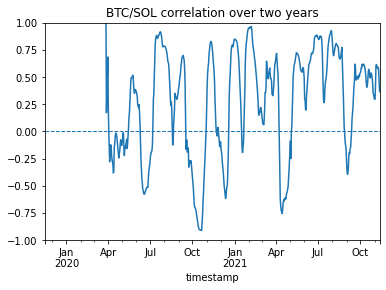

In [7]:
year_corr.unstack()['BTC','SOL'].plot()
ax = plt.gca()
ax.set_ylim((-1,1))
ax.axhline(y=0, ls='--', lw=1)
ax.set_title('BTC/SOL correlation over two years')

<h2>Plot all Pairs</h2>

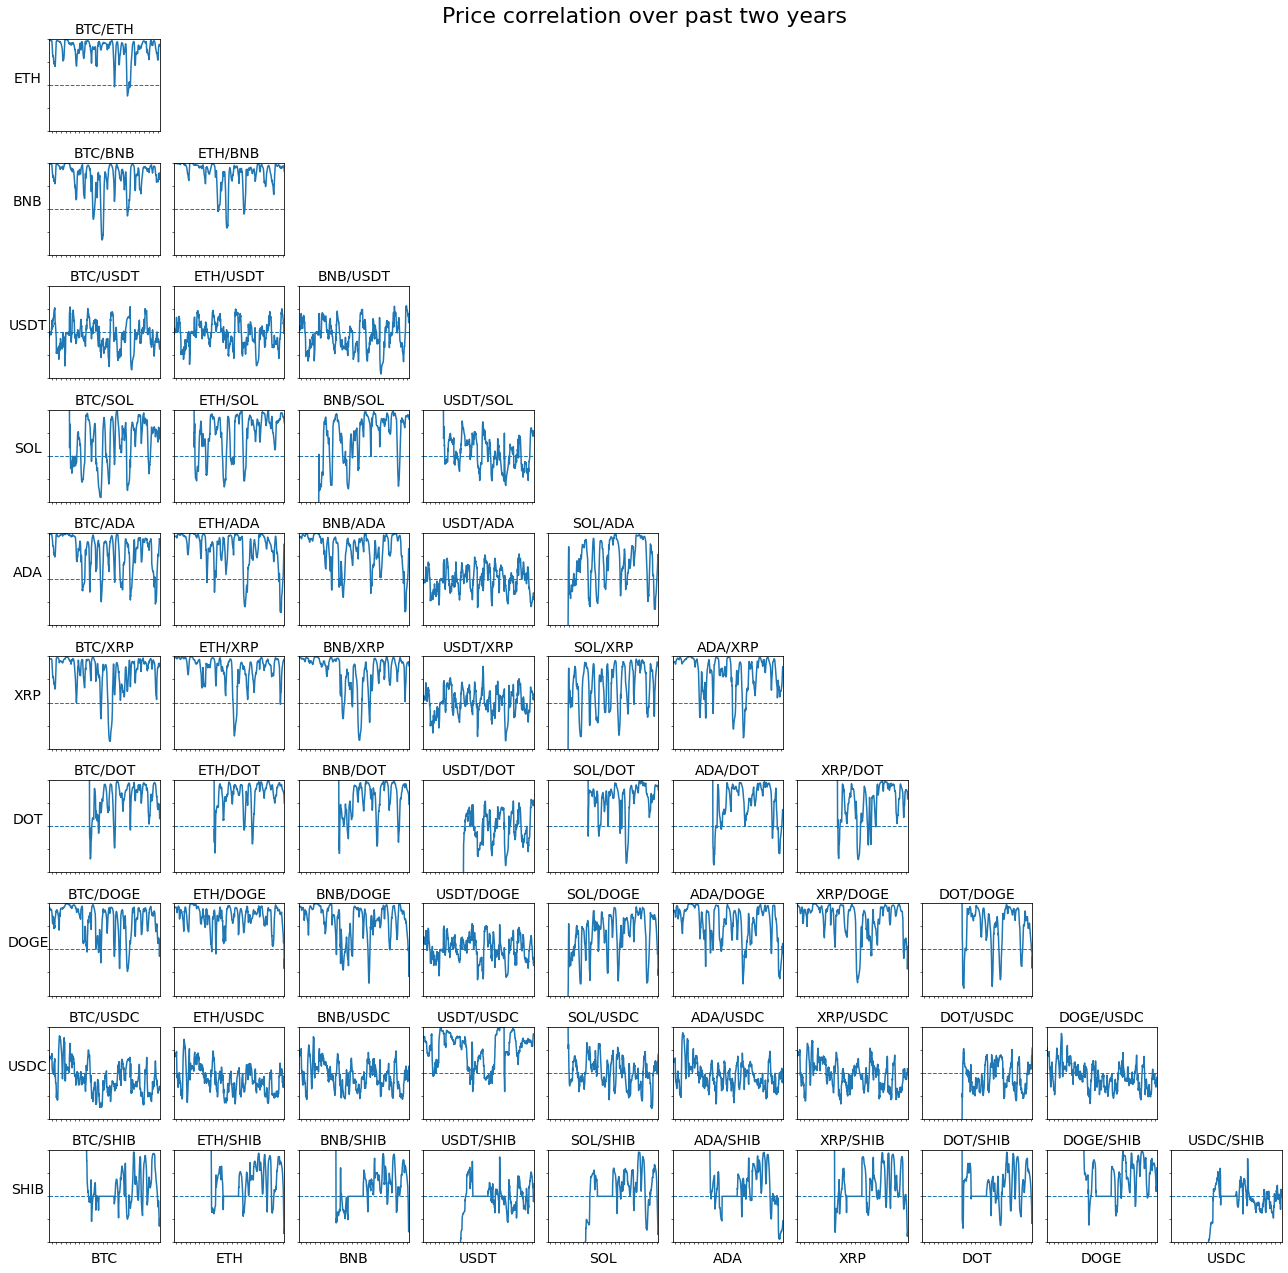

In [8]:
fig, axes = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(18,18))
fig.patch.set_facecolor('xkcd:white')
for i, key1 in enumerate(year_corr):
    if i==0 : continue
    for j, key2 in enumerate(year_corr):
        if j == len(year_corr.columns)-1 : continue
        
        ax = axes[i-1][j]
        
        if j < i: 
            year_corr.unstack()[key1,key2].plot(ax=ax)
            ax.axhline(y=0, ls='--', lw=1)
            # if i == j+1 : 
            ax.set_title(key2+'/'+key1, fontsize=14)
        else:
            ax.axis('off')
            # ax.set_title(key1, fontsize=14)
            
        ax.set_ylim((-1,1))
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
        if j == 0 : ax.set_ylabel(key1, rotation=0, fontsize=14, labelpad=16)
        if i == len(year_corr.columns)-1 : ax.set_xlabel(key2,fontsize=14)

fig.suptitle('Price correlation over past two years', fontsize=22)
fig.tight_layout()